<div class="alert alert-block alert-info">

Accepted. See comments.

In [1]:
#Import packages
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
from stargazer.stargazer import Stargazer

In [2]:
df = pd.read_csv('medicine_degree.csv')

*a) calculating the mean of income af and dist by the variable grade group*

In [11]:
#groupby
grade_df = df.groupby('grade_group')

#mean income and mean distance
mean_income = grade_df.mean().income_af

mean_distance = grade_df.mean().dist


grade_group
0   -1.553859
1   -0.703602
2   -0.346824
3   -0.198494
4   -0.075352
5    0.026972
6    0.098815
7    0.249583
8    0.442909
9    1.142432
Name: dist, dtype: float64

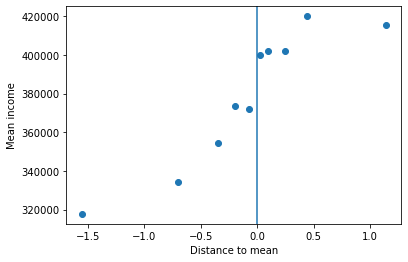

In [24]:
#plot
plt.scatter(mean_distance, mean_income)
plt.axvline(x=0)
plt.xlabel('Distance to mean')
plt.ylabel('Mean income')
plt.show()

*b) effect of interest*

Eyeballing it, it looks like there might be an effect of around 2000 - 2500 DKK

<div class="alert alert-block alert-info">
Yes, but note that is rather 20.000-25.000

*c) estimate the (subgroup) ATE via a simple linear regression of income af on eligible and remember to restrict the data according to the bandwidth. Also construct a 95 pct confidence interval.*

In [29]:
med_df = df[(df['dist']>= -1) & (df['dist']<= 1)]


In [32]:
#fit model: income_af on eligibility
model = smf.ols(formula = 'income_af ~eligible', data = med_df)
results = model.fit(cov_type = 'HC0')

print(results.conf_int())
results.summary()

                       0              1
Intercept  346479.953539  355671.737773
eligible    46647.356776   65531.597745


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              income_af   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     135.6
Date:                Wed, 24 Feb 2021   Prob (F-statistic):           3.60e-30
Time:                        14:05:03   Log-Likelihood:                -21194.
No. Observations:                1658   AIC:                         4.239e+04
Df Residuals:                    1656   BIC:                         4.240e+04
Df Model:                           1                                         
Covariance Type:                  HC0                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.511e+05   2344.886    149.720      0.000    3.46e+05    3.56e+05
eligible    5.609e+04   4817.497     11.643      0.000    4.66e+04    6.55e+04
==============================================================================
Omnibus:                        8.210   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.016   Jarque-Bera (JB):                6.545
Skew:                          -0.058   Prob(JB):                       0.0379
Kurtosis:                       2.715   Cond. No.                         2.42
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

First regression analysis looks like being eligible for med school gives you an average income of 56 000 kronor more per year. 

*d) estimate the (subgroup) ATE via a linear regression of income af on eligible. To correct for the fact that relationship between GPA and income is not completely flat, however, now include dist as well as eligible interacted with dist in the regression*

In [36]:
#fit model: income_af on eligibility, distance and interaction between the two
model = smf.ols(formula = 'income_af ~ eligible * dist', data = med_df)
results = model.fit(cov_type = 'HC0')

print(results.conf_int())
results.summary()

                           0              1
Intercept      365868.529568  384391.934997
eligible         8765.692901   41406.670430
dist            37856.382806   71199.980269
eligible:dist  -65633.161860   10130.071008


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              income_af   R-squared:                       0.106
Model:                            OLS   Adj. R-squared:                  0.104
Method:                 Least Squares   F-statistic:                     69.88
Date:                Wed, 24 Feb 2021   Prob (F-statistic):           1.51e-42
Time:                        14:18:12   Log-Likelihood:                -21178.
No. Observations:                1658   AIC:                         4.236e+04
Df Residuals:                    1654   BIC:                         4.238e+04
Df Model:                           3                                         
Covariance Type:                  HC0                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      3.751e+05   4725.445     79.385      0.000    3.66e+05    3.84e+05
eligible       2.509e+04   8326.933      3.013      0.003    8765.693    4.14e+04
dist           5.453e+04   8506.176      6.410      0.000    3.79e+04    7.12e+04
eligible:dist -2.775e+04   1.93e+04     -1.436      0.151   -6.56e+04    1.01e+04
==============================================================================
Omnibus:                       11.035   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.004   Jarque-Bera (JB):                8.637
Skew:                          -0.082   Prob(JB):                       0.0133
Kurtosis:                       2.686   Cond. No.                         10.1
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

This model shows us a more moderat effect on income of being eligible for med school, and the 95% CI is a lot bigger. The uncertainty becomes larger (as we can see on the p-value and the std error). dist shows the plot on left hand side, which, in accordance to our plot, has a steeper curve than on the right hand. ELigible shows the change in the effect, meaning that it is less steep on the right hand side. 

<div class="alert alert-block alert-info">
Yes - in the last sentence eligible*dist not eligible.

*e)Repeat c) and d) while setting the bandwidth k to either 0.25 or 2 instead.*

In [55]:
#small k data
small = df[(df['dist']>= -0.25) & (df['dist']<= 0.25)]


In [56]:
#fit model: income_af on eligibility, small k
model = smf.ols(formula = 'income_af ~eligible', data = small)
results = model.fit(cov_type = 'HC0')

print(results.conf_int())
first.append(results)
results.summary()

                       0              1
Intercept  362201.740813  381188.498934
eligible    16728.738066   46933.619201


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              income_af   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     17.07
Date:                Wed, 24 Feb 2021   Prob (F-statistic):           4.08e-05
Time:                        14:35:58   Log-Likelihood:                -8424.9
No. Observations:                 652   AIC:                         1.685e+04
Df Residuals:                     650   BIC:                         1.686e+04
Df Model:                           1                                         
Covariance Type:                  HC0                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.717e+05   4843.650     76.739      0.000    3.62e+05    3.81e+05
eligible    3.183e+04   7705.468      4.131      0.000    1.67e+04    4.69e+04
==============================================================================
Omnibus:                       51.998   Durbin-Watson:                   1.929
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.078
Skew:                          -0.379   Prob(JB):                     2.94e-07
Kurtosis:                       2.271   Cond. No.                         2.65
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

We still observe a positive effect of being eligible, but it's lower than our previous estimate.

In [58]:
#fit model: income_af on eligibility, distance and interaction between the two, small k
model = smf.ols(formula = 'income_af ~ eligible * dist', data = small)
results = model.fit(cov_type = 'HC0')

print(results.conf_int())
second.append(results)
results.summary()

                           0              1
Intercept      355756.974512  393622.178030
eligible         3175.547236   59811.947352
dist          -103202.415466  144563.752194
eligible:dist -243567.530883  150769.996855


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              income_af   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     5.699
Date:                Wed, 24 Feb 2021   Prob (F-statistic):           0.000745
Time:                        14:38:19   Log-Likelihood:                -8424.8
No. Observations:                 652   AIC:                         1.686e+04
Df Residuals:                     648   BIC:                         1.688e+04
Df Model:                           3                                         
Covariance Type:                  HC0                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      3.747e+05   9659.668     38.789      0.000    3.56e+05    3.94e+05
eligible       3.149e+04   1.44e+04      2.180      0.029    3175.547    5.98e+04
dist           2.068e+04   6.32e+04      0.327      0.744   -1.03e+05    1.45e+05
eligible:dist  -4.64e+04   1.01e+05     -0.461      0.645   -2.44e+05    1.51e+05
==============================================================================
Omnibus:                       50.866   Durbin-Watson:                   1.929
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.982
Skew:                          -0.382   Prob(JB):                     3.09e-07
Kurtosis:                       2.279   Cond. No.                         36.6
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

What we can see here is that the difference between the slopes is smaller (and insignificant), but that the effect of being eligible is stronger than with a higher K, but yet again the p-value is higher. compared to the simple regression above, there is almost no difference in means when the interaction term is included, meaning that the slope is probably pretty similar.

*f) Estimate the (subgroup) ATE of interest using a package that selects the bandwidth (k) based on your data.*

In [60]:
from rdd import rdd

In [64]:
#Find optimal bandwidth
bandwidth_opt = rdd.optimal_bandwidth(df['income_af'], df['dist'], cut= 0)
print("Optimal bandwidth:", bandwidth_opt)

Optimal bandwidth: 0.7577751648499014


In [67]:
#fit model: income_af on eligibility, optimal k
optimal= df[(df['dist']>= -bandwidth_opt) & (df['dist']<= bandwidth_opt)]

model = smf.ols(formula = 'income_af ~eligible', data = optimal)
results = model.fit(cov_type = 'HC0')

print(results.conf_int())
first.append(results)
results.summary()

                       0              1
Intercept  349026.366975  359298.180091
eligible    42506.114344   62408.468390


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              income_af   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     106.7
Date:                Wed, 24 Feb 2021   Prob (F-statistic):           3.42e-24
Time:                        15:04:08   Log-Likelihood:                -18568.
No. Observations:                1450   AIC:                         3.714e+04
Df Residuals:                    1448   BIC:                         3.715e+04
Df Model:                           1                                         
Covariance Type:                  HC0                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.542e+05   2620.409    135.155      0.000    3.49e+05    3.59e+05
eligible    5.246e+04   5077.224     10.332      0.000    4.25e+04    6.24e+04
==============================================================================
Omnibus:                       14.504   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               10.848
Skew:                          -0.107   Prob(JB):                      0.00441
Kurtosis:                       2.634   Cond. No.                         2.43
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

In [66]:
#fit model: income_af on eligibility, distance and interaction between the two, optimal k
model = smf.ols(formula = 'income_af ~ eligible * dist', data = optimal)
results = model.fit(cov_type = 'HC0')

print(results.conf_int())
results.summary()

                           0              1
Intercept      370291.801991  391678.709667
eligible         -533.424608   35753.033494
dist            50776.089453   99530.485455
eligible:dist  -89375.076902   10134.705042


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              income_af   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     58.07
Date:                Wed, 24 Feb 2021   Prob (F-statistic):           1.90e-35
Time:                        15:04:05   Log-Likelihood:                -18553.
No. Observations:                1450   AIC:                         3.711e+04
Df Residuals:                    1446   BIC:                         3.713e+04
Df Model:                           3                                         
Covariance Type:                  HC0                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       3.81e+05   5455.944     69.829      0.000     3.7e+05    3.92e+05
eligible       1.761e+04   9256.920      1.902      0.057    -533.425    3.58e+04
dist           7.515e+04   1.24e+04      6.042      0.000    5.08e+04    9.95e+04
eligible:dist -3.962e+04   2.54e+04     -1.561      0.119   -8.94e+04    1.01e+04
==============================================================================
Omnibus:                       15.416   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               11.634
Skew:                          -0.118   Prob(JB):                      0.00298
Kurtosis:                       2.631   Cond. No.                         13.0
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

The effect of eligibility somehow disappears with this optimal bandwidth and the interaction term, since our p-value is higher than .5, meaning that there is no difference in income if you get accepted to medical school or not.

<div class="alert alert-block alert-info">
Significant at 10% level, but yes.

*g) covariate balance check*

In [70]:
optimal.head()
covariates = ['age','par_income', 'income_bf', 'woman', 'cph', 'par_edu']

In [72]:
#covariate balance
models = []

for item in covariates: 
    model = smf.ols(formula = item + ' ~ eligible', data = optimal)
    results = model.fit(cov_type = 'HC0')
    models.append(results)

table = Stargazer(models)

table.custom_columns(covariates, [1 for i in range(len(covariates))])
table

The groups are only similar in terms of the gender balance and city balance, meaning the conditional random assignment does not hold. The income variables, which are very important in our case, are significant, meaning that the eligible students already have a higher income than the non-eligible ones. This would question the validity of the results. 

<div class="alert alert-block alert-info">
Yes, note that the imbalance becomes smaller when including the interaction term (compare to solutoin).

*g) ITT with optimal bandwidth, with interaction effect*

The intent to treat effect is approximately 17 610 DKK, with a 95% CI of -533.424608  :  35753.033494.

*h) Plot acceptance and mean gpa*

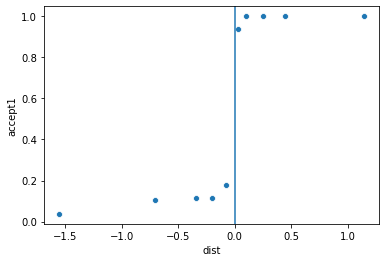

In [79]:
#Group by
accept_grouped = df.groupby('grade_group').mean()

sns.scatterplot(x = accept_grouped.dist, y = accept_grouped.accept1, data = df)
plt.axvline(x = 0)

We have observations that are larger than 0, meaning we have compliers

*i)Estimate the LATE of interest via 2SLS, while choosing the bandwidth (k) to be 1 and without including dist in the regression*

In [86]:
#import packages
from statsmodels.api import add_constant
from linearmodels.iv import IV2SLS

med_df['const'] = 1

<ipython-input-86-808283c2870f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  med_df['const'] = 1


In [89]:
#Estimate LATE with a 2SLS model of accepting on income, eligibility as instrument, k = 1

ivmod = IV2SLS(med_df['income_af'], exog = med_df['const'], endog = med_df['accept1'], instruments = med_df['eligible'])

iv_res = ivmod.fit(cov_type = 'robust')
print(iv_res.conf_int())
iv_res

                 lower          upper
const    338459.951403  348430.119481
accept1   53867.934893   75140.450293


IV-2SLS Estimation Summary                          
==============================================================================
Dep. Variable:              income_af   R-squared:                      0.1566
Estimator:                    IV-2SLS   Adj. R-squared:                 0.1561
No. Observations:                1658   F-statistic:                    141.28
Date:                Wed, Feb 24 2021   P-value (F-stat)                0.0000
Time:                        15:53:54   Distribution:                  chi2(1)
Cov. Estimator:                robust                                         
                                                                              
                             Parameter Estimates                              
==============================================================================
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
const       3.434e+05     2543.5     135.03     0.0000   3.385e+05   3.484e+05
accept1      6.45e+04     5426.8     11.886     0.0000   5.387e+04   7.514e+04
==============================================================================

Endogenous: accept1
Instruments: eligible
Robust Covariance (Heteroskedastic)
Debiased: False
IVResults, id: 0x7fa378dd2070

*j) Estimate the LATE of interest and use a package to select the optimal bandwidth (k) based on your data.*

In [90]:
optimal['const'] = 1

<ipython-input-90-73e33b85eb67>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  optimal['const'] = 1


In [91]:
#Estimate LATE with a 2SLS model of accepting on income, eligibility as instrument, k = optimal

ivmod = IV2SLS(optimal['income_af'], exog = optimal['const'], endog = optimal['accept1'], instruments = optimal['eligible'])

iv_res = ivmod.fit(cov_type = 'robust')
print(iv_res.conf_int())
iv_res

                 lower          upper
const    341380.261731  352481.513975
accept1   49254.249080   71670.589233


IV-2SLS Estimation Summary                          
==============================================================================
Dep. Variable:              income_af   R-squared:                      0.1454
Estimator:                    IV-2SLS   Adj. R-squared:                 0.1449
No. Observations:                1450   F-statistic:                    111.79
Date:                Wed, Feb 24 2021   P-value (F-stat)                0.0000
Time:                        15:57:37   Distribution:                  chi2(1)
Cov. Estimator:                robust                                         
                                                                              
                             Parameter Estimates                              
==============================================================================
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
const       3.469e+05     2832.0     122.50     0.0000   3.414e+05   3.525e+05
accept1     6.046e+04     5718.6     10.573     0.0000   4.925e+04   7.167e+04
==============================================================================

Endogenous: accept1
Instruments: eligible
Robust Covariance (Heteroskedastic)
Debiased: False
IVResults, id: 0x7fa378e9a610

# Question 2

– What assumptions does the paper rely on to identify causal effects?

The instrumental variable (seat-assignment) is conditionally random assigned. The instrument should only influence the outcome (voting congruence) through the independent variable, which in this case is sitting adjacent to someone from the same party. The instrument should have an impact on the independent variable, meanting that there are compliers.

– How does the paper justify the identifying assumptions ex ante (i.e. before estimating things in the data)? Do you find the assumptions credible? Why/why not?

They check whether the instrument influence on the outcome in a group of MEP's that are not seated alphabetically. They also condition on contemporaneous and past seating. This test showed that alphabetical adjacency had no direct impact on voting congruence among these MEPs, meaning it operates through a different variable. I find it credible that the assumptions hold, because alphabetical seating seems random to me, and it does not influence the outcome, meaning that it should have an effect on something else, that in turn influences the outcome.

– How does the paper try to substantiate the identifying assumptions using the actual data? Do you find that this adds to the credibility of the results? Why/why not?

They take into account the size of the party, and that similar names might mean that you have similar backgrounds.  I think adding these conditions strengthens the claim that the IV is conditionally random assigned.


– The paper estimates both a LATE and an ITT. How does the paper emphasize and use each of these?
The ITT is used to determine the effect of being assigned a certain seat on the outcome variable, and the LATE is used to capture peer effects, or the local average treatment effect of being seated next to someone from your own party, taking controls into account. 

– What is the role of the section entitled ’Heterogeneity in peer effects’ ?

Here they are taking into account differences within differences. They find  that peer effects are indeedmuch greater if the MEP-pair are both women or if they come from the same country.

– Taking into account all the above, what (if anything) do you think we credible learn from this paper? What (if anything) is left unanswered regarding the paper’s key research question(s)?

We learn that peer pressure is a phenomena that should be taken into account when exmaning voting behaviour, and that how people are seated matters. Maybe it should be considered when seats are allocated in the parliament: maybe you shouldn't sit next to someone from your own party. 